# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pprint import pprint
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city_url = ""
units = "imperial"


In [4]:
city_url = cities[0]
query_url = f"{url}appid={weather_api_key}&q={city_url}&units={units}"
weather_response = requests.get(query_url).json()

In [5]:
#testing retrieval to see data structure
pprint(weather_response)

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 22.08, 'lon': -159.32},
 'dt': 1603490731,
 'id': 5848280,
 'main': {'feels_like': 77.13,
          'humidity': 88,
          'pressure': 1014,
          'temp': 75.2,
          'temp_max': 75.2,
          'temp_min': 75.2},
 'name': 'Kapaa',
 'sys': {'country': 'US',
         'id': 7873,
         'sunrise': 1603471019,
         'sunset': 1603512344,
         'type': 1},
 'timezone': -36000,
 'visibility': 4828,
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'},
             {'description': 'mist', 'icon': '50d', 'id': 701, 'main': 'Mist'}],
 'wind': {'deg': 230, 'gust': 18.34, 'speed': 11.41}}


In [6]:
city_list = []
clouds = []
country = []
date = []
humidity = []
max_temp = []
wind_speed = []
lat = []
lon = []

In [7]:
#user output
print("Beginning Data Retrieval")
print("----------------------------")
record_num = 0
for x in range(len(cities)):
    try:
        city_url = cities[x]
        query_url = f"{url}appid={weather_api_key}&q={city_url}&units=imperial"
        weather_response = requests.get(query_url).json()
        city_list.append(weather_response['name'])
        clouds.append(weather_response['clouds']['all'])
        country.append(weather_response['sys']['country'])
        date.append(weather_response['dt'])
        humidity.append(weather_response['main']['humidity'])
        max_temp.append(weather_response['main']['temp_max'])
        wind_speed.append(weather_response['wind']['speed'])
        lat.append(weather_response['coord']['lat'])
        lon.append(weather_response['coord']['lon'])
        record_num += 1
        print(f"Processing Record {record_num} | {weather_response['name']}")
    except KeyError:
        print("City not found. Skipping...")
        record_num -= 1

Beginning Data Retrieval
----------------------------
Processing Record 1 | Kapaa
Processing Record 2 | Bengkulu
Processing Record 3 | Atuona
Processing Record 4 | Española
Processing Record 5 | Hermanus
Processing Record 6 | Tasiilaq
Processing Record 7 | Esperance
Processing Record 8 | Kavieng
Processing Record 9 | San Policarpo
Processing Record 10 | Arlit
Processing Record 11 | Ixtapa
Processing Record 12 | Arraial do Cabo
Processing Record 13 | Bud
Processing Record 14 | Elk City
Processing Record 15 | Bethel
Processing Record 16 | Aksu
Processing Record 17 | Ushuaia
Processing Record 18 | Hilo
Processing Record 19 | Russell
Processing Record 20 | Narsaq
Processing Record 21 | Lavrentiya
Processing Record 22 | Punta Arenas
Processing Record 23 | Kathmandu
Processing Record 24 | Albany
Processing Record 25 | Cidreira
Processing Record 26 | Wisconsin Rapids
Processing Record 27 | Rikitea
Processing Record 28 | Mataura
Processing Record 29 | São João da Barra
Processing Record 30 | N

Processing Record 213 | Zhalantun
Processing Record 214 | Peniche
City not found. Skipping...
Processing Record 214 | Ugoofaaru
Processing Record 215 | Chicomuselo
Processing Record 216 | Chalmette
Processing Record 217 | Puri
Processing Record 218 | Lima
City not found. Skipping...
Processing Record 218 | Acapulco de Juárez
City not found. Skipping...
Processing Record 218 | Baoying
Processing Record 219 | Ancud
Processing Record 220 | Bubaque
Processing Record 221 | Winona
Processing Record 222 | Cayenne
Processing Record 223 | Zhigansk
Processing Record 224 | Honāvar
Processing Record 225 | Touros
Processing Record 226 | Olafsvik
Processing Record 227 | KwaDukuza
Processing Record 228 | Bathsheba
Processing Record 229 | Bhongīr
Processing Record 230 | Popondetta
City not found. Skipping...
City not found. Skipping...
Processing Record 229 | Tabou
Processing Record 230 | Roald
Processing Record 231 | Gummidipundi
Processing Record 232 | Valdemārpils
Processing Record 233 | Crişan
Pro

Processing Record 428 | Yuanping
Processing Record 429 | Manoel Urbano
Processing Record 430 | Vidim
Processing Record 431 | Pandan
Processing Record 432 | Cobija
Processing Record 433 | Vila Franca do Campo
City not found. Skipping...
Processing Record 433 | Punta de Piedra
Processing Record 434 | Metro
Processing Record 435 | Nālūt
Processing Record 436 | Illela
Processing Record 437 | Iquique
Processing Record 438 | Kariba
City not found. Skipping...
Processing Record 438 | Nagato
Processing Record 439 | Botucatu
Processing Record 440 | San Jose
Processing Record 441 | Promissão
Processing Record 442 | Wārāseonī
Processing Record 443 | Chernyshevskiy
Processing Record 444 | Nemuro
City not found. Skipping...
Processing Record 444 | Kaitangata
City not found. Skipping...
City not found. Skipping...
Processing Record 443 | Cortez
Processing Record 444 | eMkhomazi
Processing Record 445 | Osakarovka
City not found. Skipping...
Processing Record 445 | Taber
Processing Record 446 | Kather

In [8]:
#existing example

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
base_df = pd.DataFrame({"City": city_list,
                       "Cloudiness": clouds,
                        "Country": country,
                        "Date": date,
                        "Humidity": humidity,
                        "Lat": lat,
                        "Lng": lon,
                        "Max Temp": max_temp,
                        "Wind Speed": wind_speed
                       })

In [10]:
base_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Kapaa,75,US,1603490731,88,22.08,-159.32,75.20,11.41
1,Bengkulu,100,ID,1603490731,92,-3.80,102.27,75.33,6.26
2,Atuona,25,PF,1603490732,77,-9.80,-139.03,78.21,19.26
3,Española,1,US,1603490717,33,35.99,-106.08,61.00,18.34
4,Hermanus,32,ZA,1603490733,91,-34.42,19.23,64.99,1.99


In [11]:
#user result
base_df.count()

City          558
Cloudiness    558
Country       558
Date          558
Humidity      558
Lat           558
Lng           558
Max Temp      558
Wind Speed    558
dtype: int64

In [12]:
#provided

In [13]:
base_df.to_csv('city_weather_data.csv')

In [14]:
#user output
file = 'city_weather_data.csv'
file_df = pd.read_csv(file, index_col=0)
file_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Kapaa,75,US,1603490731,88,22.08,-159.32,75.20,11.41
1,Bengkulu,100,ID,1603490731,92,-3.80,102.27,75.33,6.26
2,Atuona,25,PF,1603490732,77,-9.80,-139.03,78.21,19.26
3,Española,1,US,1603490717,33,35.99,-106.08,61.00,18.34
4,Hermanus,32,ZA,1603490733,91,-34.42,19.23,64.99,1.99


In [15]:
#provided output

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

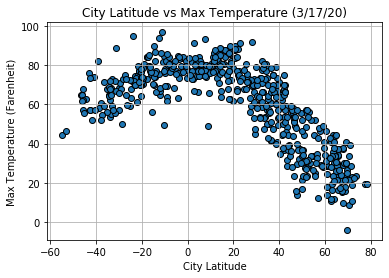

In [16]:
#user output
lat_temp_chart = plt.scatter(base_df['Lat'],base_df['Max Temp'],edgecolors='k')
plt.grid(which='both', axis='both')
plt.title("City Latitude vs Max Temperature (3/17/20)")
plt.xlabel("City Latitude")
plt.ylabel("Max Temperature (Farenheit)")
plt.savefig('Latitude_vs_Temp_all')
plt.show()
#Temperatures peak around the equator, and are hotter below the equator for the same distance. 

In [17]:
#provided output

#### Latitude vs. Humidity Plot

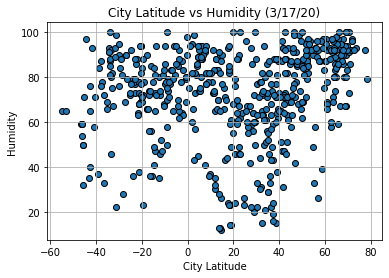

In [18]:
#user output
lat_hum_chart = plt.scatter(base_df['Lat'],base_df['Humidity'],edgecolors='k')
plt.grid(which='both', axis='both')
plt.title("City Latitude vs Humidity (3/17/20)")
plt.xlabel("City Latitude")
plt.ylabel("Humidity")
plt.savefig('Latitude_vs_Humidity_all')
plt.show()
#There is no clear trend in with latitude & humidity

In [19]:
#provided output

#### Latitude vs. Cloudiness Plot

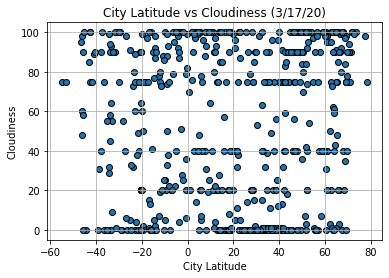

In [20]:
#user output
lat_cloud_chart = plt.scatter(base_df['Lat'],base_df['Cloudiness'],edgecolors='k')
plt.grid(which='both', axis='both')
plt.title("City Latitude vs Cloudiness (3/17/20)")
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness")
plt.savefig('Latitude_vs_Cloudiness_all')
plt.show()
#"Cloudiness" tends to be measured more often in multiples of 10

In [21]:
#provided output

#### Latitude vs. Wind Speed Plot

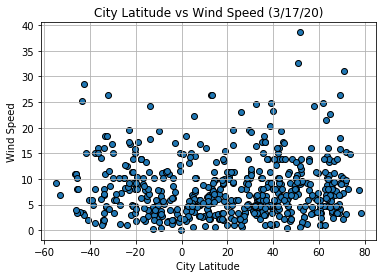

In [22]:
#user output
lat_wind_chart = plt.scatter(base_df['Lat'],base_df['Wind Speed'],edgecolors='k')
plt.grid(which='both', axis='both')
plt.title("City Latitude vs Wind Speed (3/17/20)")
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed")
plt.savefig('Latitude_vs_Wind_all')
plt.show()
#Wind speed seems to trend higher as latitude moves away from the equator, particularly to the north

In [23]:
#provided output

## Linear Regression

In [24]:
# OPTIONAL: Create a function to create Linear Regression plots
def lin_reg(x,y):
    plt.scatter(x,y)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    print(f"The r-squared is: {rvalue}.")
    

In [25]:
# Create Northern and Southern Hemisphere DataFrames
north_df = base_df.loc[base_df['Lat'] > 0]
south_df = base_df.loc[base_df['Lat'] <= 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8695175330153572.


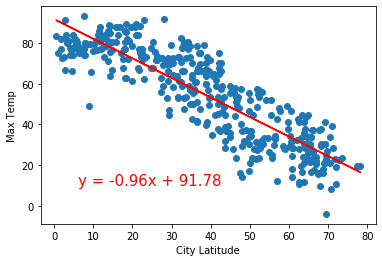

In [26]:
#user output
lin_reg(north_df['Lat'],north_df['Max Temp'])
plt.xlabel("City Latitude")
plt.ylabel("Max Temp")
plt.savefig('Latitude_vs_Temp_northhemi')
plt.show()

In [27]:
#provided output

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6151741814126369.


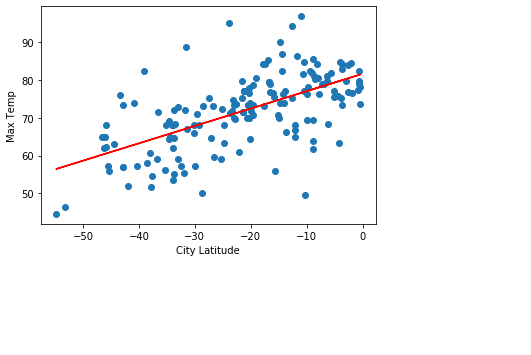

In [28]:
#user output
lin_reg(south_df['Lat'],south_df['Max Temp'])
plt.xlabel("City Latitude")
plt.ylabel("Max Temp")
plt.savefig('Latitude_vs_Temp_southhemi')
plt.show()

In [29]:
#provided output

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3043383766080677.


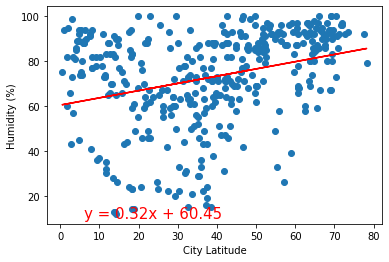

In [30]:
#user output
lin_reg(north_df['Lat'],north_df['Humidity'])
plt.xlabel("City Latitude")
plt.ylabel("Humidity (%)")
plt.savefig('Latitude_vs_Humidity_northhemi')
plt.show()

In [31]:
#provided output

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14746083762750678.


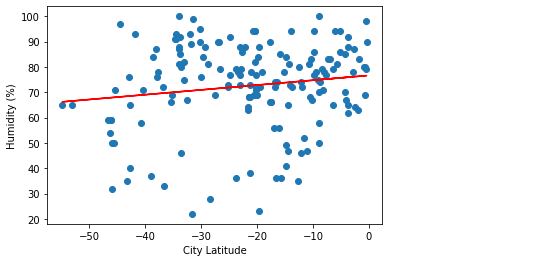

In [32]:
#user output
lin_reg(south_df['Lat'],south_df['Humidity'])
plt.xlabel("City Latitude")
plt.ylabel("Humidity (%)")
plt.savefig('Latitude_vs_Humidity_southhemi')
plt.show()

In [33]:
#provided output

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.14976118272705213.


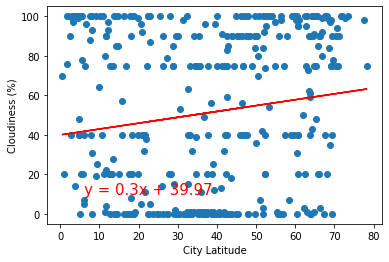

In [34]:
#user output
lin_reg(north_df['Lat'],north_df['Cloudiness'])
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig('Latitude_vs_Clouds_northhemi')
plt.show()

In [35]:
#provided output

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.04730565512708087.


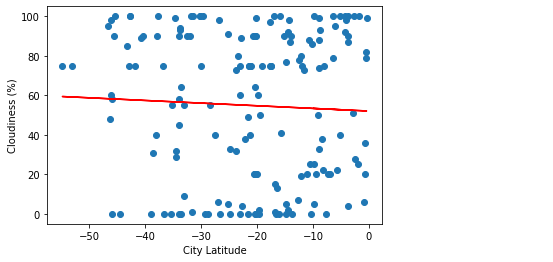

In [36]:
#user output
lin_reg(south_df['Lat'],south_df['Cloudiness'])
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig('Latitude_vs_Clouds_southhemi')
plt.show()

In [37]:
#provided output

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.09884707627586334.


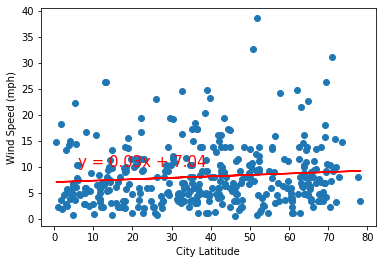

In [38]:
#user output
lin_reg(north_df['Lat'],north_df['Wind Speed'])
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig('Latitude_vs_wind_northhemi')
plt.show()

In [39]:
#provided output

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.04730565512708087.


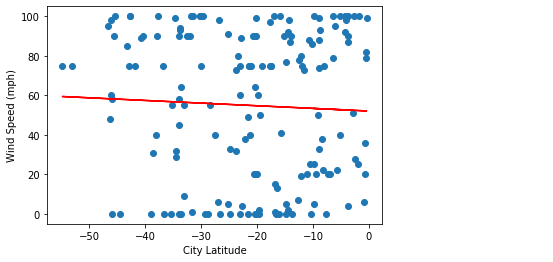

In [40]:
#user output
lin_reg(south_df['Lat'],south_df['Cloudiness'])
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig('Latitude_vs_wind_southhemi')
plt.show()

In [41]:
#provided output